In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [2]:
def getFrequencies(sequences, counts=None, alphabet=['A', 'T', 'G', 'C']):

    """
    Computes the frequency of each base from the defined alphabet at each position in a list of equal-length DNA sequences.
    
    Args:
        sequences (list of str): List of DNA sequences (all must be the same length).
        counts (list of ints): List of integers indicating the count of each unique sequence.
    
    Returns:
        pd.DataFrame: A DataFrame where columns are bases (A, C, G, T) and rows are positions (0-indexed).
    """
    
    seqlen = len(sequences[0])
    dct_counts = {char : [0 for i in range(0, seqlen)] for char in alphabet}

    if counts is None:
        counts = [1 for x in range(0, len(sequences))]    

    for c, s in zip(counts, sequences):
        for i in range(0, seqlen):
            dct_counts[s[i]][i] += c
            
    df_counts = pd.DataFrame(dct_counts)
    df_frequencies = df_counts/sum(counts)
    return df_frequencies

In [3]:
def getExpected(F, s):
    """
    Computes the probability of a sequence s given the initial model - frequency matrix F

    Args:
        s (str): a single sequence
        F (dct): A dictionary of frequencies

    """
    return np.prod(np.array([F[s[i]][i] for i in range(0, len(s))]))

In [4]:
df_strc_init = pd.read_csv('../../datasets/datasets_prepped/strc_init.csv', index_col=0)

In [5]:
number_of_mols_synthesized = 5.6*10**13

In [6]:
df_snfq = getFrequencies(df_strc_init['seq'], counts=df_strc_init['count'])
dct_snfq = df_snfq.to_dict()

In [7]:
# For each theoretical library member, compute the expected frequency
expected_frequencies = np.array([getExpected(dct_snfq, s) for s in df_strc_init['seq']])

# Multiply these frequencies by the number of synthesized molecules to get the copy number distribution
copy_numbers = expected_frequencies * number_of_mols_synthesized

# Sort copy numbers
copy_numbers = np.sort(copy_numbers)

Here is what the distribution looks like when I compute the copy numbers for all sequences sequenced in the initial library dataset.

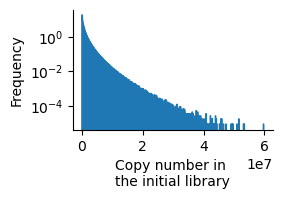

In [8]:
# Plot the distribution of copy numbers with the 99th percentile represented by a vertical line
axis_width, axis_height = 2, 1.2
left_margin, bottom_margin = 1, 1
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])

# Plot
sns.histplot(copy_numbers, bins=500, element='step', stat='frequency', alpha=1)

plt.yscale('log')
plt.xlabel('Copy number in \nthe initial library')
sns.despine()

plt.show()
#plt.savefig('cpm_distribution_initial_expected.pdf')
#plt.savefig('cpm_distribution_initial_expected.svg')

Here are the nubmers:

In [9]:
# Get the min and max copy number if we consider the entire encoded sequence space
min_copy_number = copy_numbers.min()
max_copy_number = copy_numbers.max()

print(f'copy number min: {min_copy_number}')
print(f'copy number max: {max_copy_number}')
print(f'fold difference between most and least abundant:{max_copy_number / min_copy_number}')

copy number min: 190.64300859958487
copy number max: 59757822.8939288
fold difference between most and least abundant:313454.0486582466


Here is what it looks like when I drop various percentages of sequences from the right tail of the distributions.

In [10]:
thresholds = list(range(1, 51))

res = []

for i in range(0, len(thresholds)):
    x_perc = int((len(copy_numbers) / 100) * thresholds[i])
    copy_numbers_sub = copy_numbers[:-x_perc]
    res.append([thresholds[i], copy_numbers_sub.min(), copy_numbers_sub.max()])

df_res = pd.DataFrame(res, columns=['percent_shaved', 'min', 'max'])
df_res['range'] = df_res['max'] / df_res['min']

df_res

,percent_shaved,min,max,range
0,1,190.643009,8.016819e+06,42051.471264
1,2,190.643009,6.076758e+06,31875.065287
2,3,190.643009,5.056362e+06,26522.674601
3,4,190.643009,4.382246e+06,22986.662400
4,5,190.643009,3.890975e+06,20409.741859
5,6,190.643009,3.507837e+06,18400.028594
6,7,190.643009,3.198922e+06,16779.645408
7,8,190.643009,2.940441e+06,15423.807686
8,9,190.643009,2.721280e+06,14274.220300
9,10,190.643009,2.531725e+06,13279.925513


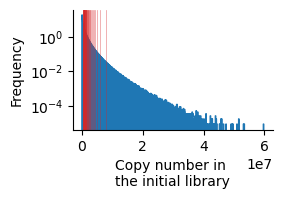

In [11]:
# Plot the distribution of copy numbers with the 99th percentile represented by a vertical line
axis_width, axis_height = 2, 1.2
left_margin, bottom_margin = 1, 1
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_axes([left_margin / fig_width, bottom_margin / fig_height, axis_width / fig_width, axis_height / fig_height])

# Plot
sns.histplot(copy_numbers, bins=500, element='step', stat='frequency', alpha=1)

for index, row in df_res.iterrows():
    plt.axvline(row['max'], color='tab:red', alpha=0.5, linewidth=0.5)
    
plt.yscale('log')
plt.xlabel('Copy number in \nthe initial library')
sns.despine()

plt.show()